# Finance Complaint Project

## Exploratory Data Analysis

### Problem Statement
    
The Consumer Financial Protection Bureau (CFPB) is a federal U.S. agency that acts as a mediator when disputes arise between financial institutions and consumers. Via a web form, consumers can send the agency a narrative of their dispute.

This project made using Natural Language Processing (NLP) with machine learning models to process the issues text written in the complaint and other features in the dataset to predict if the customer will dispute or not.

Industry use case: An NLP + Machine learning model would make the classification of whether the consumer will dispute with the companty or not and thus helping the company to prioritize the complaint based on the prediction.

Importing Required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
import os

warnings.filterwarnings("ignore")

%matplotlib inline
pd.set_option('display.max_columns',50)

In [2]:
os.chdir("D:\\Bala\\Project_Inprogress\\Finance\\")
os.getcwd()

'D:\\Bala\\Project_Inprogress\\Finance'

### Reading the Input file in Parquet Format

In [3]:
df = pd.read_parquet('input.parquet')
df.head(3)

,Company,Company_public_response,Company_response_to_consumer,Complaint_ID,Consumer_complaint_narrative,Complaint_what_happened,Consumer_disputed,Date_received,Date_sent_to_company,Issue,Product,State,Sub_issue,Sub_product,Submitted_via,Tags,Timely_responsed,ZIP_code
0,Portfolio Recovery Associates,None,None,ID000000,Narrative D,Yes,No,2024-10-03,2022-03-23,Problem with a credit reporting company's inve...,Student loan,GA,Improper reporting,Auto loan,Web,None,Yes,None
1,Fifth Third Bank,None,Company believes it acted appropriately,ID000001,Narrative D,Yes,No,2023-08-23,2024-03-09,Service not received,Business loan,NY,Multiple inquiries on credit report,None,Email,None,Yes,None
2,Bank of America,None,None,ID000002,Narrative E,Yes,Yes,2024-10-15,2023-01-28,Problems with account management,Business loan,VA,None,Personal line of credit,Web,None,Yes,None


### Unique values in target Column

In [4]:
df["Consumer_disputed"].unique()

array(['No', 'Yes'], dtype=object)

In [5]:
df.Consumer_disputed.value_counts(normalize=True)*100

Consumer_disputed
No     79.8328
Yes    20.1672
Name: proportion, dtype: float64

### Shape of the dataset

In [6]:
df.shape

(250000, 18)

### Null Values

In [7]:
df.isnull().sum()

Company                              0
Company_public_response         192887
Company_response_to_consumer    192988
Complaint_ID                         0
Consumer_complaint_narrative         0
Complaint_what_happened              0
Consumer_disputed                    0
Date_received                        0
Date_sent_to_company                 0
Issue                                0
Product                              0
State                                0
Sub_issue                       195212
Sub_product                     195445
Submitted_via                    12475
Tags                            193115
Timely_responsed                     0
ZIP_code                        187721
dtype: int64

### Replace empty strings into Nan Value

In [8]:
df.replace("", np.nan, inplace=True)

### Summary of the Dataset

In [9]:
df = df.astype(dtype='O')

In [10]:
df.describe().T

,count,unique,top,freq
Company,250000,23,US Bank,11085
Company_public_response,57113,11,Closed with non-monetary relief,5350
Company_response_to_consumer,57012,11,Closed with explanation,5249
Complaint_ID,250000,250000,ID249983,1
Consumer_complaint_narrative,250000,5,Narrative D,50244
Complaint_what_happened,250000,2,Yes,224643
Consumer_disputed,250000,2,No,199582
Date_received,250000,1096,2024-05-19 00:00:00,278
Date_sent_to_company,250000,1096,2023-06-05 00:00:00,271
Issue,250000,13,Billing disputes,19495


### Check Data types of dataset column wise

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Company                       250000 non-null  object
 1   Company_public_response       57113 non-null   object
 2   Company_response_to_consumer  57012 non-null   object
 3   Complaint_ID                  250000 non-null  object
 4   Consumer_complaint_narrative  250000 non-null  object
 5   Complaint_what_happened       250000 non-null  object
 6   Consumer_disputed             250000 non-null  object
 7   Date_received                 250000 non-null  object
 8   Date_sent_to_company          250000 non-null  object
 9   Issue                         250000 non-null  object
 10  Product                       250000 non-null  object
 11  State                         250000 non-null  object
 12  Sub_issue                     54788 non-null   object
 13 

# EXPLORING DATA

In [12]:
numerical_features = [i for i in df.columns if df[i].dtype != 'O']
Categorical_features = [i for i in df.columns if df[i].dtype == 'O' ]

print(f"We have  {len(numerical_features)} numerical columns in our dataset: {numerical_features}")
print(f"We have  {len(Categorical_features)} categorical columns in our dataset: {Categorical_features}")

We have  0 numerical columns in our dataset: []
We have  18 categorical columns in our dataset: ['Company', 'Company_public_response', 'Company_response_to_consumer', 'Complaint_ID', 'Consumer_complaint_narrative', 'Complaint_what_happened', 'Consumer_disputed', 'Date_received', 'Date_sent_to_company', 'Issue', 'Product', 'State', 'Sub_issue', 'Sub_product', 'Submitted_via', 'Tags', 'Timely_responsed', 'ZIP_code']


### Checking Null Values

In [13]:
print(df.shape)
print(df.shape[0])

(250000, 18)
250000


In [14]:
df.isnull().sum()

Company                              0
Company_public_response         192887
Company_response_to_consumer    192988
Complaint_ID                         0
Consumer_complaint_narrative         0
Complaint_what_happened              0
Consumer_disputed                    0
Date_received                        0
Date_sent_to_company                 0
Issue                                0
Product                              0
State                                0
Sub_issue                       195212
Sub_product                     195445
Submitted_via                    12475
Tags                            193115
Timely_responsed                     0
ZIP_code                        187721
dtype: int64

In [15]:
missing = df.isnull().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0,ascending=False)
missing

,0
Sub_product,78.1780
Sub_issue,78.0848
Tags,77.2460
Company_response_to_consumer,77.1952
Company_public_response,77.1548
ZIP_code,75.0884
Submitted_via,4.9900
Company,0.0000
Consumer_complaint_narrative,0.0000
Complaint_ID,0.0000


In [16]:
drop_columns = ['Tags', 'Complaint_what_happened', 'Company_public_response', 'Sub_issue', 'Sub_product', 'ZIP_code', 'Complaint_ID']
df.drop(columns=drop_columns, inplace=True)
df.head()

,Company,Company_response_to_consumer,Consumer_complaint_narrative,Consumer_disputed,Date_received,Date_sent_to_company,Issue,Product,State,Submitted_via,Timely_responsed
0,Portfolio Recovery Associates,None,Narrative D,No,2024-10-03 00:00:00,2022-03-23 00:00:00,Problem with a credit reporting company's inve...,Student loan,GA,Web,Yes
1,Fifth Third Bank,Company believes it acted appropriately,Narrative D,No,2023-08-23 00:00:00,2024-03-09 00:00:00,Service not received,Business loan,NY,Email,Yes
2,Bank of America,None,Narrative E,Yes,2024-10-15 00:00:00,2023-01-28 00:00:00,Problems with account management,Business loan,VA,Web,Yes
3,Chase Bank,None,Narrative A,No,2022-07-14 00:00:00,2023-09-15 00:00:00,Incorrect information on your report,Retail store card,NJ,Phone,Yes
4,American Express Company,None,Narrative A,Yes,2022-07-19 00:00:00,2022-04-24 00:00:00,Identity theft issues,Debt collection,MN,Web,Yes


### Unique Values in the columns

In [17]:
for col in df.columns:
    print(f'{col} : {len(df[col].unique())}')

Company : 23
Company_response_to_consumer : 12
Consumer_complaint_narrative : 5
Consumer_disputed : 2
Date_received : 1096
Date_sent_to_company : 1096
Issue : 13
Product : 13
State : 20
Submitted_via : 5
Timely_responsed : 2


# VISUALIZATION

### Visualize the target feature

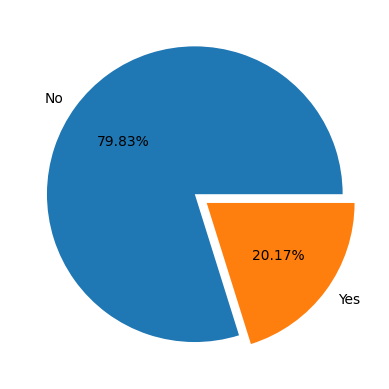

In [18]:
percentage = df.Consumer_disputed.value_counts(normalize=True)*100
labels = ['No','Yes']

# pull is given as a fraction of the pie radius
explode = (0, 0.1)
plt.pie(percentage,labels=labels, explode=explode, autopct= '%1.2f%%')
plt.show()

## Imabalanced Dataset

From the above chart, it clearly shows that the dataset is an imbalanced dataset. Where the value of 'No' is around 80% and 'Yes' is only 20%

### Visualize product percentage in a pie chart

In [19]:

product_percentage = df['Product'].value_counts (normalize=True)*100 
product_percentage


Product
Personal loan        7.8104
Retail store card    7.8028
Home equity loan     7.7784
Credit reporting     7.7428
Credit card          7.7352
Business loan        7.7024
Insurance            7.6992
Auto loan            7.6612
Mortgage             7.6420
Student loan         7.6304
Payment plan         7.6272
Debt collection      7.5868
Bank account         7.5812
Name: proportion, dtype: float64

Visualize product percentage in a pie chart

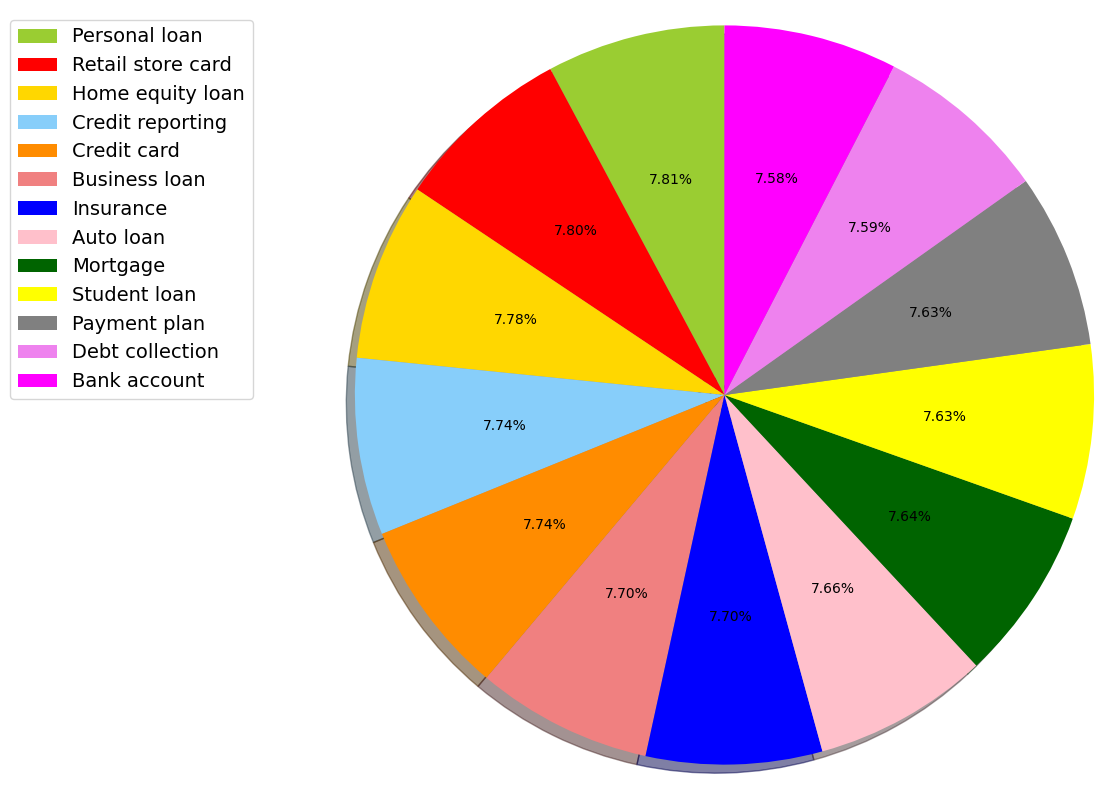

In [20]:
product_percentage = df['Product'].value_counts (normalize=True)*100 
product_labels = product_percentage.index
colors = ['yellowgreen', 'red', 'gold', 'lightskyblue', 'darkorange', 'lightcoral', 'blue', 'pink', 'darkgreen', 'yellow', 'grey', 'violet', 'magenta', 'cyan']
fig, ax = plt.subplots(figsize =(18, 10))
patches, texts, _ = ax.pie(product_percentage, startangle=90, shadow=True, colors=colors, radius=1.2, autopct='%1.2f%%')
plt.legend(patches, product_labels, loc='best', bbox_to_anchor=(-0.1, 1.),fontsize=14)
plt.show()


States & their impact on target feature

In [21]:
top_states = df.State.value_counts(normalize=True)*100
top_states.to_frame()[:10]

,proportion
State,
CO,5.0800
CA,5.0636
MI,5.0612
VA,5.0608
MN,5.0568
NC,5.0348
FL,5.0288
IL,5.0244
MA,5.0240


<Axes: xlabel='State'>

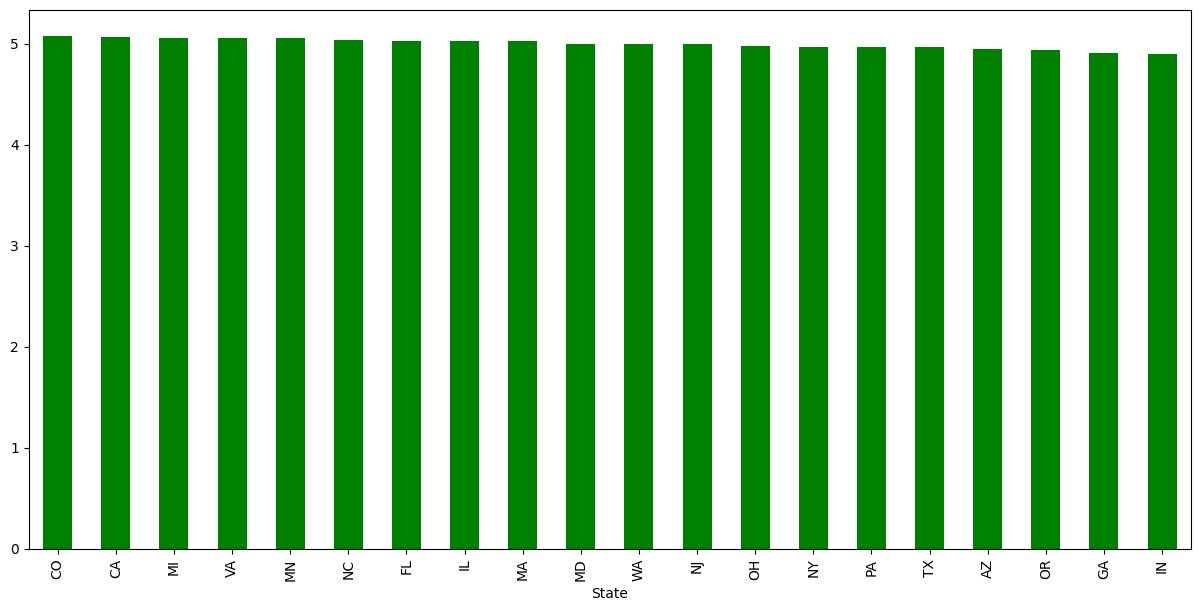

In [22]:
plt.subplots(figsize=(15,7))
top_states.plot(kind='bar',color='green')


Insights

From the above chart, we need to focus more on states like "CO", "CA", "MI", "VA", "MN" as they were thee states getting higher dispute compare to other states

## Company Response and its effect on Target Feature

In [23]:
df.groupby('Company_response_to_consumer')['Consumer_disputed'].value_counts(normalize=True).to_frame()*100

proportion
Company_response_to_consumer            Consumer_disputed            
Additional documentation requested      No                  79.291763
                                        Yes                 20.708237
Closed with explanation                 No                  80.358163
                                        Yes                 19.641837
Closed with monetary relief             No                  79.268293
                                        Yes                 20.731707
Closed with non-monetary relief         No                  79.615235
                                        Yes                 20.384765
Company believes it acted appropriately No                  80.000000
                                        Yes                 20.000000
Company has responded to the consumer   No                  80.430640
                                        Yes                 19.569360
Customer service attempted to contact   No                  79.992327
                                        Yes                 20.007673
In progress                             No                  81.043110
                                        Yes                 18.956890
Investigation ongoing                   No                  78.659855
                                        Yes                 21.340145
No response provided                    No                  80.331707
                                        Yes                 19.668293
Response under review                   No                  79.891093
                                        Yes                 20.108907

In [33]:
df.columns

Index(['Company', 'Company_response_to_consumer',
       'Consumer_complaint_narrative', 'Consumer_disputed', 'Date_received',
       'Date_sent_to_company', 'Issue', 'Product', 'State', 'Submitted_via',
       'Timely_responsed'],
      dtype='object')

In [35]:
dispute_df = df[df['Consumer_disputed'] == 'Yes']
dispute_df.Company_response_to_consumer.value_counts(normalize=True).to_frame()*100

,proportion
Company_response_to_consumer,
Closed with monetary relief,9.494720
Investigation ongoing,9.477267
Additional documentation requested,9.389999
Closed with non-monetary relief,9.154376
Customer service attempted to contact,9.102016
Response under review,9.023475
Company believes it acted appropriately,9.006021
Closed with explanation,8.997295
Company has responded to the consumer,8.962388


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Company believes it acted appropriately'),
  Text(1, 0, 'Customer service attempted to contact'),
  Text(2, 0, 'Additional documentation requested'),
  Text(3, 0, 'No response provided'),
  Text(4, 0, 'Response under review'),
  Text(5, 0, 'Company has responded to the consumer'),
  Text(6, 0, 'Closed with explanation'),
  Text(7, 0, 'In progress'),
  Text(8, 0, 'Investigation ongoing'),
  Text(9, 0, 'Closed with non-monetary relief'),
  Text(10, 0, 'Closed with monetary relief')])

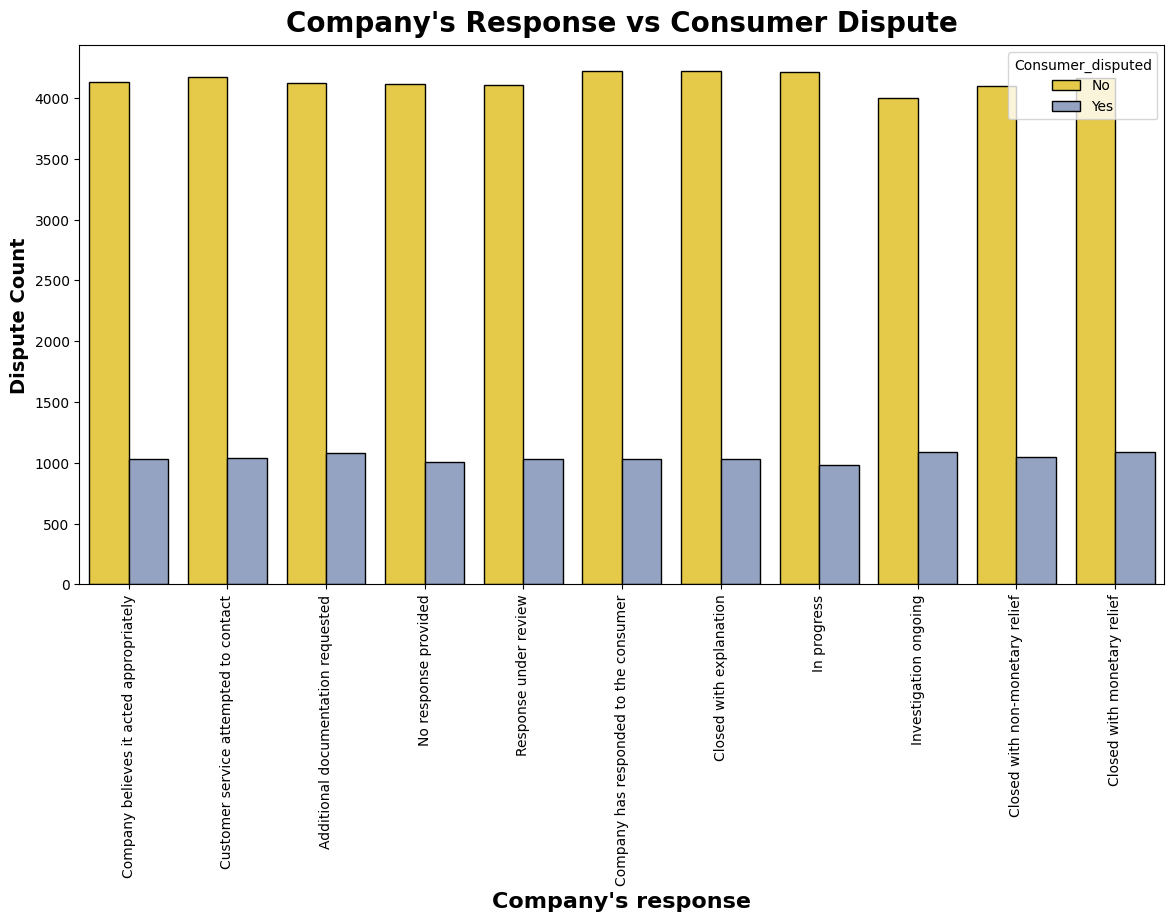

In [40]:
plt.subplots(figsize=(14,7))
sns.countplot(x='Company_response_to_consumer',hue="Consumer_disputed", data=df, ec='black', palette='Set2_r')
plt.title("Company's Response vs Consumer Dispute", weight='bold',fontsize=20, pad=10)
plt.ylabel("Dispute Count", weight="bold", fontsize=14)
plt.xlabel("Company's response", weight="bold", fontsize=16)
plt.xticks(rotation=90)

# Finance Complaint Year and Disputed Consumer's count
•   The Year the CFPB received the complaint.

•   As this is the imbalanced data. visualizing only the data in which consumer has dispute on the company's response

In [43]:
df.columns

Index(['Company', 'Company_response_to_consumer',
       'Consumer_complaint_narrative', 'Consumer_disputed', 'Date_received',
       'Date_sent_to_company', 'Issue', 'Product', 'State', 'Submitted_via',
       'Timely_responsed'],
      dtype='object')

In [44]:
# create a copy of dispute consumer data 
viz_df = dispute_df.copy()
viz_df[ 'received_date']= pd.to_datetime (viz_df['Date_received']) .dt.date 
viz_df[ 'received_month'] = pd.to_datetime (viz_df[ 'Date_received']).dt.month 
viz_df[ 'received_year'] = pd.to_datetime (viz_df[ 'Date_received']).dt.year

In [48]:
viz_df.head()

,Company,Company_response_to_consumer,Consumer_complaint_narrative,Consumer_disputed,Date_received,Date_sent_to_company,Issue,Product,State,Submitted_via,Timely_responsed,received_date,received_month,received_year
2,Bank of America,None,Narrative E,Yes,2024-10-15 00:00:00,2023-01-28 00:00:00,Problems with account management,Business loan,VA,Web,Yes,2024-10-15,10,2024
4,American Express Company,None,Narrative A,Yes,2022-07-19 00:00:00,2022-04-24 00:00:00,Identity theft issues,Debt collection,MN,Web,Yes,2022-07-19,7,2022
6,Portfolio Recovery Associates,None,Narrative E,Yes,2024-03-20 00:00:00,2023-04-27 00:00:00,Service not received,Personal loan,MN,None,Yes,2024-03-20,3,2024
7,Navy Federal Credit Union,Company believes it acted appropriately,Narrative D,Yes,2024-04-08 00:00:00,2024-05-28 00:00:00,Billing disputes,Payment plan,VA,Web,No,2024-04-08,4,2024
14,"TransUnion Intermediate Holdings, Inc.",Customer service attempted to contact,Narrative E,Yes,2023-09-25 00:00:00,2022-05-29 00:00:00,Loan application denied,Credit card,TX,Phone,Yes,2023-09-25,9,2023


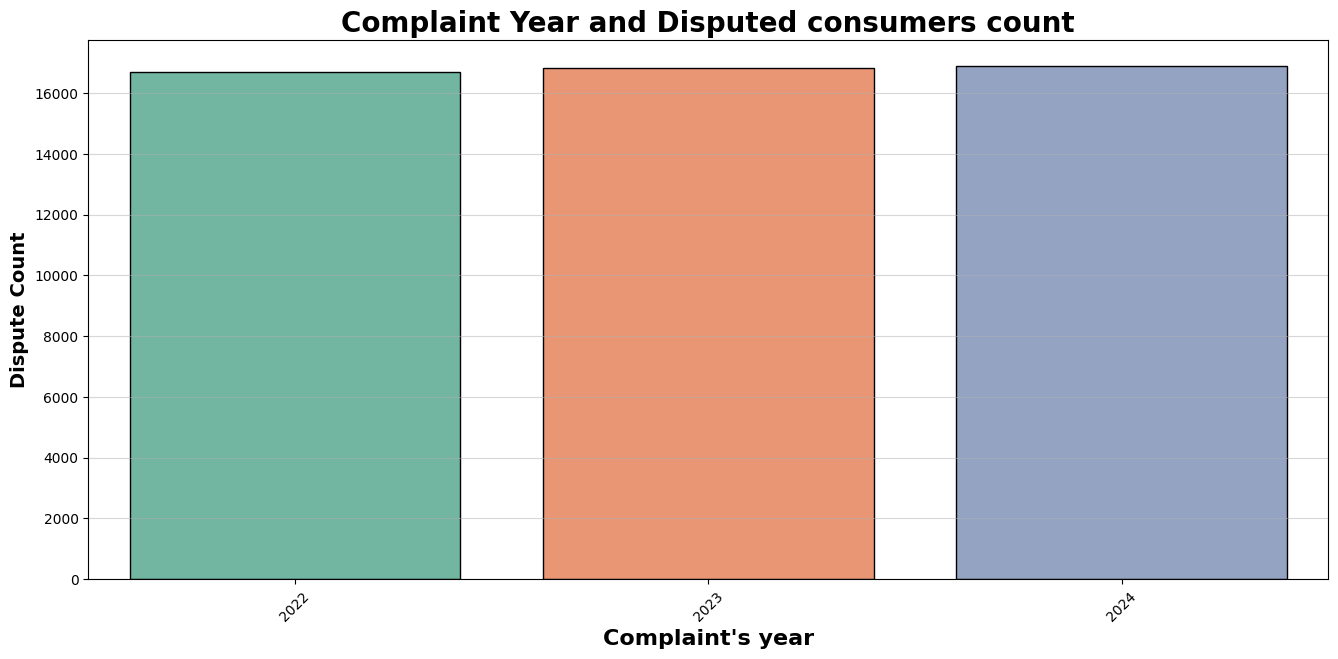

In [52]:

plt.subplots(figsize=(16,7))
sns.countplot(x="received_year", data= viz_df, palette="Set2", ec = "black") 
plt.xticks(rotation=45)
plt.title("Complaint Year and Disputed consumers count", weight="bold", fontsize=20) 
plt.ylabel("Dispute Count", weight="bold", fontsize=14)
plt.xlabel("Complaint's year", weight="bold", fontsize=16)
plt.grid (alpha = 0.5, axis= "y")
plt.show()

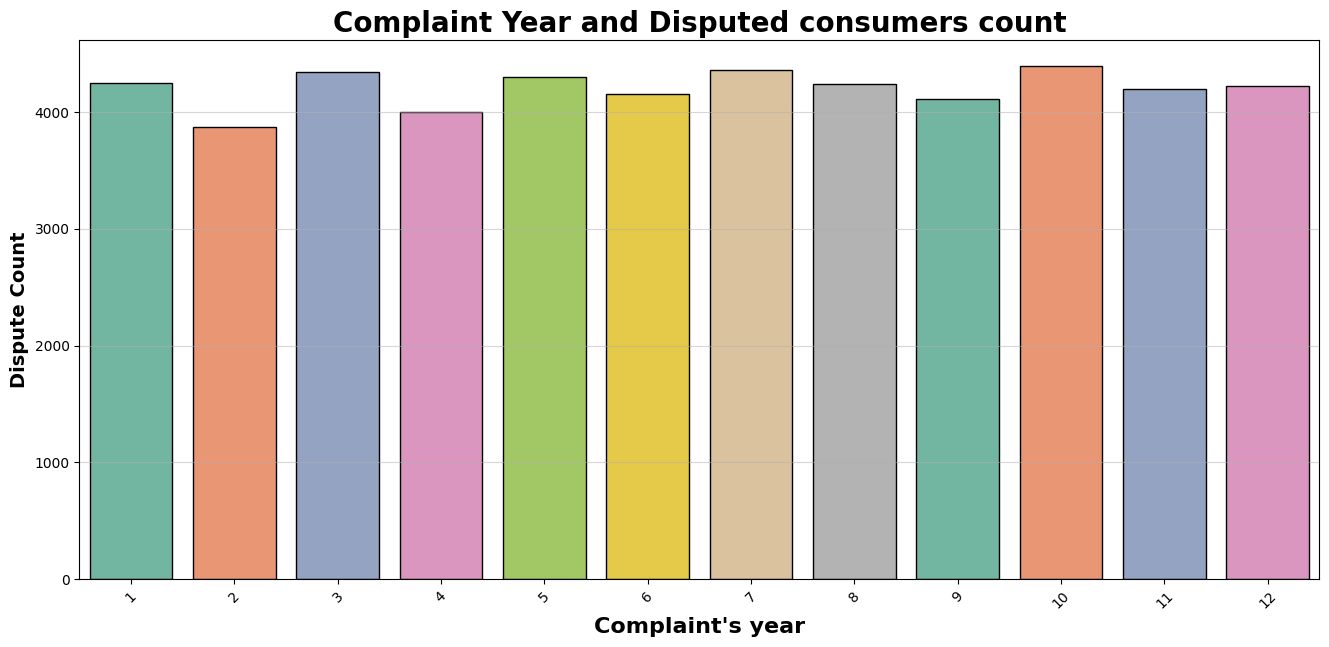

In [53]:

plt.subplots(figsize=(16,7))
sns.countplot(x="received_month", data= viz_df, palette="Set2", ec = "black") 
plt.xticks(rotation=45)
plt.title("Complaint Year and Disputed consumers count", weight="bold", fontsize=20) 
plt.ylabel("Dispute Count", weight="bold", fontsize=14)
plt.xlabel("Complaint's year", weight="bold", fontsize=16)
plt.grid (alpha = 0.5, axis= "y")
plt.show()

# Complaint Submission

In [54]:
df.Submitted_via.value_counts(normalize=True).to_frame()*100

,proportion
Submitted_via,
Web,52.762446
Postal mail,20.992738
Phone,20.987264
Email,5.257552


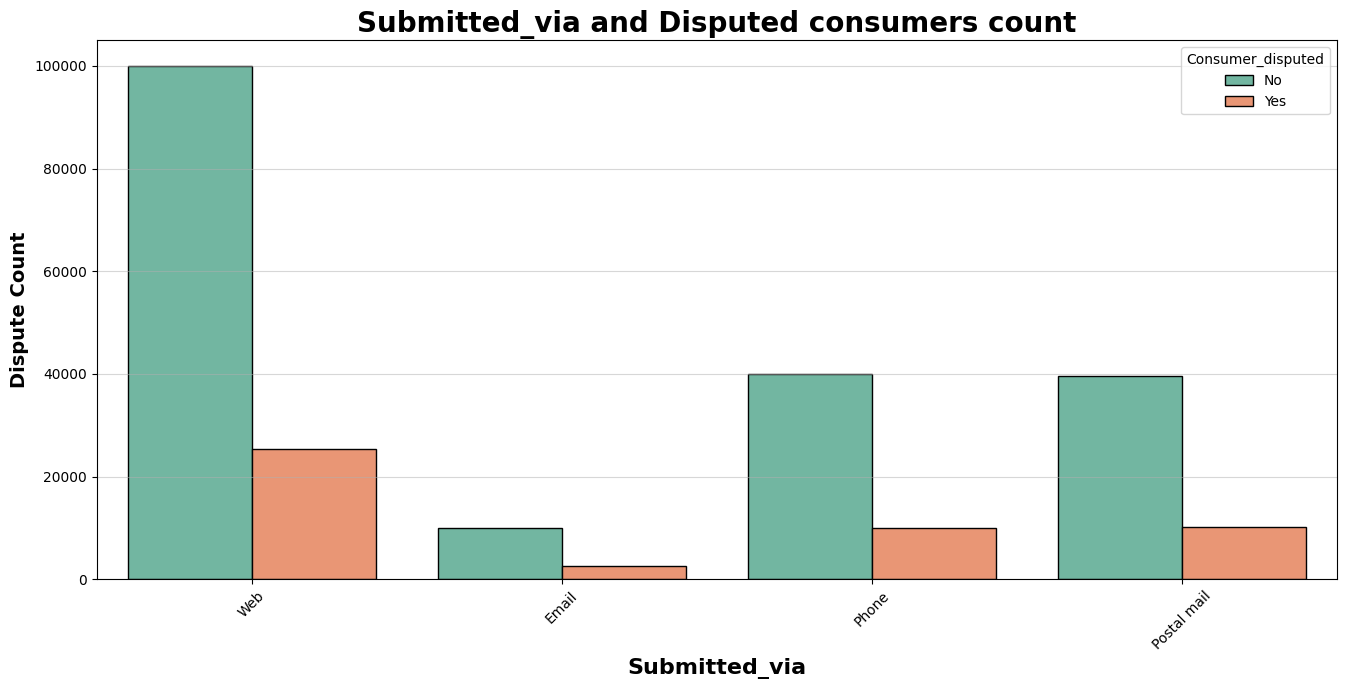

In [59]:

plt.subplots(figsize=(16,7))
sns.countplot(x="Submitted_via", hue='Consumer_disputed',data= df, palette="Set2", ec = "black") 
plt.xticks(rotation=45)
plt.title("Submitted_via and Disputed consumers count", weight="bold", fontsize=20) 
plt.ylabel("Dispute Count", weight="bold", fontsize=14)
plt.xlabel("Submitted_via", weight="bold", fontsize=16)
plt.grid (alpha = 0.5, axis= "y")
plt.show()

# Timely Response has an effect on Dispute or not

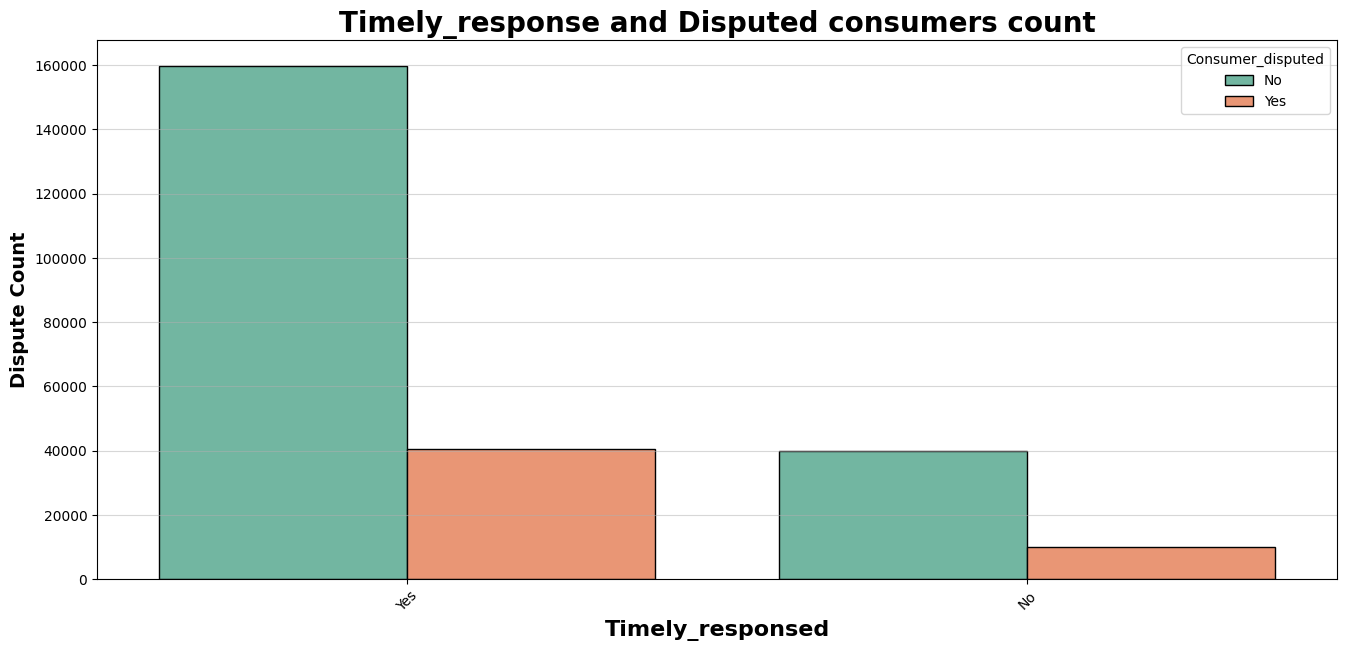

In [60]:
 plt.subplots(figsize=(16,7))
sns.countplot(x="Timely_responsed", hue='Consumer_disputed',data= df, palette="Set2", ec = "black") 
plt.xticks(rotation=45)
plt.title("Timely_response and Disputed consumers count", weight="bold", fontsize=20) 
plt.ylabel("Dispute Count", weight="bold", fontsize=14)
plt.xlabel("Timely_responsed", weight="bold", fontsize=16)
plt.grid (alpha = 0.5, axis= "y")
plt.show()

# Consumer Consent Provided or Not

In [61]:
df.columns

Index(['Company', 'Company_response_to_consumer',
       'Consumer_complaint_narrative', 'Consumer_disputed', 'Date_received',
       'Date_sent_to_company', 'Issue', 'Product', 'State', 'Submitted_via',
       'Timely_responsed'],
      dtype='object')

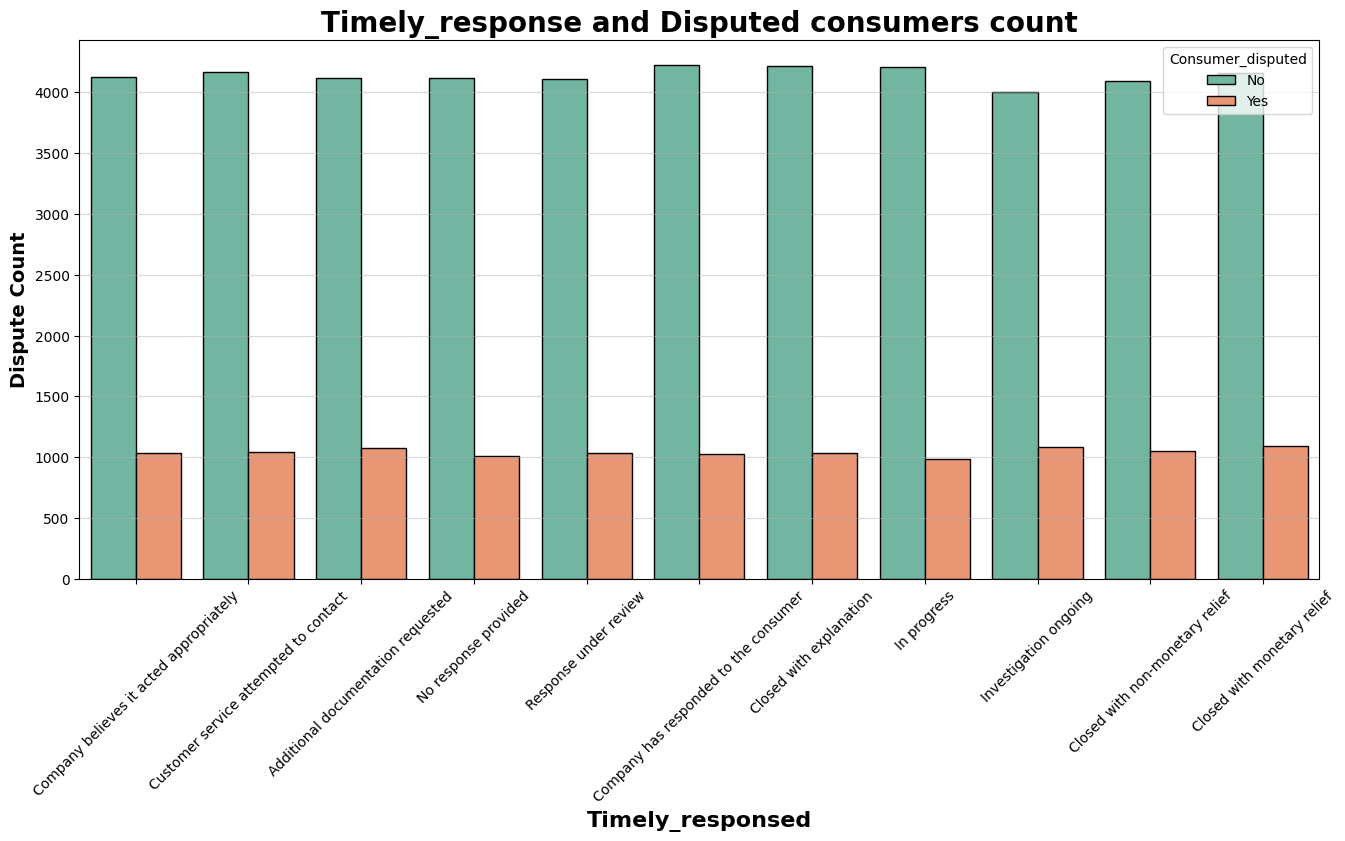

In [62]:
 plt.subplots(figsize=(16,7))
sns.countplot(x="Company_response_to_consumer", hue='Consumer_disputed',data= df, palette="Set2", ec = "black") 
plt.xticks(rotation=45)
plt.title("Timely_response and Disputed consumers count", weight="bold", fontsize=20) 
plt.ylabel("Dispute Count", weight="bold", fontsize=14)
plt.xlabel("Timely_responsed", weight="bold", fontsize=16)
plt.grid (alpha = 0.5, axis= "y")
plt.show()


# Final Report

Dataset is collected from consumerfinance US government website.

tags, complaint_what_happened, company_public_response, sub_issue, sub_product, zip_code, complaint_id are the columns which can be removed asthey are redundant or doesn't help the model.

company its a name column can be removed as it contains 4284 unique values, which cannot be used in model.

new feature can be created days_to_forward_complaint which is the difference between date_sent_to_company -date_received.

issue column is a text column, so text processing can be done and vectorized by tfidf for the model training.

Null values can be imputed with mode.